(-5.0, 5.0)

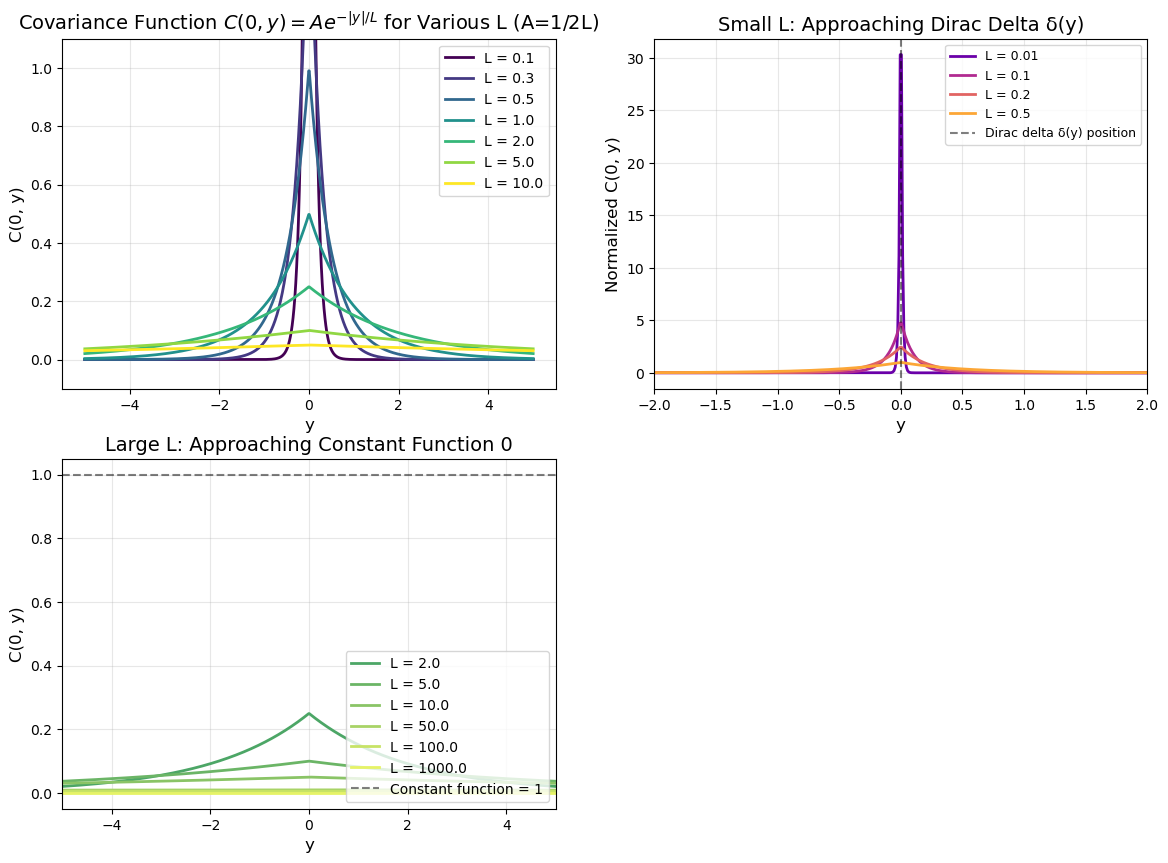

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simps

def covariance_function(y, A=1.0, L=1.0):
    """Calculate C(0,y) = A * exp(-|y|/L)"""
    return A * np.exp(-np.abs(y)/L)

y = np.linspace(-5, 5, 1000)
L_values = [0.1, 0.3, 0.5, 1.0, 2.0, 5.0, 10.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(L_values)))

plt.figure(figsize=(14, 10))
ax1 = plt.subplot(2, 2, 1)
for L, color in zip(L_values, colors):
    C = covariance_function(y, A=1/(2*L), L=L)
    ax1.plot(y, C, color=color, label=f'L = {L}', linewidth=2)
    
ax1.set_xlabel('y', fontsize=12)
ax1.set_ylabel('C(0, y)', fontsize=12)
ax1.set_title('Covariance Function $C(0,y) = A e^{-|y|/L}$ for Various L (A=1/2L)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_ylim(-0.1, 1.1)

# Plot 2: Zoom in to show small L behavior (Dirac delta-like)
ax2 = plt.subplot(2, 2, 2)
small_L_values = [.01, 0.1, 0.2, 0.5]
small_colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(small_L_values)))

for L, color in zip(small_L_values, small_colors):
    C = covariance_function(y, A=1/(2*L), L=L)
    # area = simps(C, y)
    C_normalized = C 
    ax2.plot(y, C_normalized, color=color, label=f'L = {L}', linewidth=2)

# Add a vertical line at y=0 to represent Dirac delta
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Dirac delta δ(y) position')
ax2.set_xlabel('y', fontsize=12)
ax2.set_ylabel('Normalized C(0, y)', fontsize=12)
ax2.set_title('Small L: Approaching Dirac Delta δ(y)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)
ax2.set_xlim(-2, 2)

# Plot 3: Show large L behavior (constant function)
ax3 = plt.subplot(2, 2, 3)
large_L_values = [2.0, 5.0, 10.0, 50.0, 100.0, 1000.0]
large_colors = plt.cm.summer(np.linspace(0.3, 0.9, len(large_L_values)))

for L, color in zip(large_L_values, large_colors):
    C = covariance_function(y, A=1/(2*L), L=L)
    ax3.plot(y, C, color=color, label=f'L = {L}', linewidth=2)

ax3.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Constant function = 1')
ax3.set_xlabel('y', fontsize=12)
ax3.set_ylabel('C(0, y)', fontsize=12)
ax3.set_title('Large L: Approaching Constant Function 0', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='lower right', fontsize=10)
ax3.set_xlim(-5, 5)


Note: contrary to the problem definition in the textbook, 
$\lim_{L \rightarrow \infty} C(0,y) = 0$ when the normalization 
$A = \frac{1}{2L}$ is used (unit area); 
$\lim_{L \rightarrow \infty} C(0,y) = \lim_{L \rightarrow \infty} \frac{1}{2L} = 0$.  
If $A$ is held fixed (e.g., $A=1$), then $\lim_{L \rightarrow \infty} C(0,y) = A$.

# 2

2.1: Generating 5 realizations of the Gaussian process...


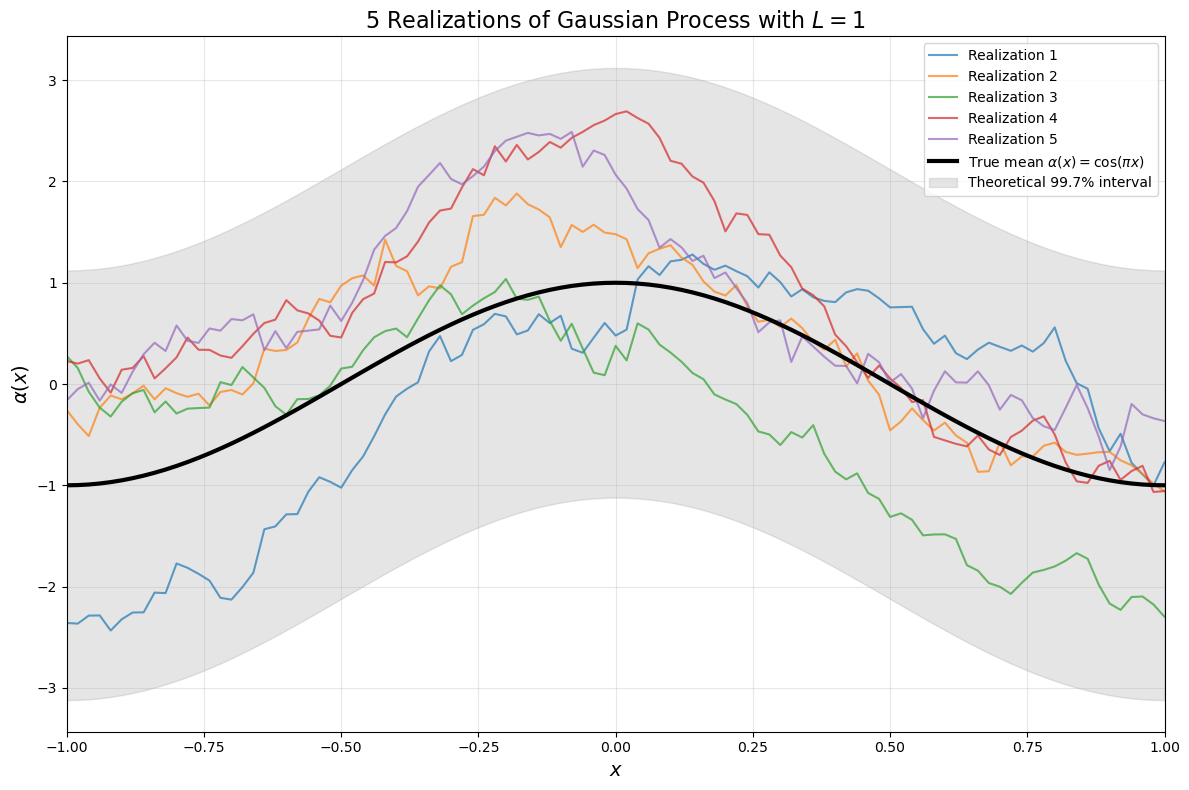


2.2: Generating 500 realizations and comparing statistics...


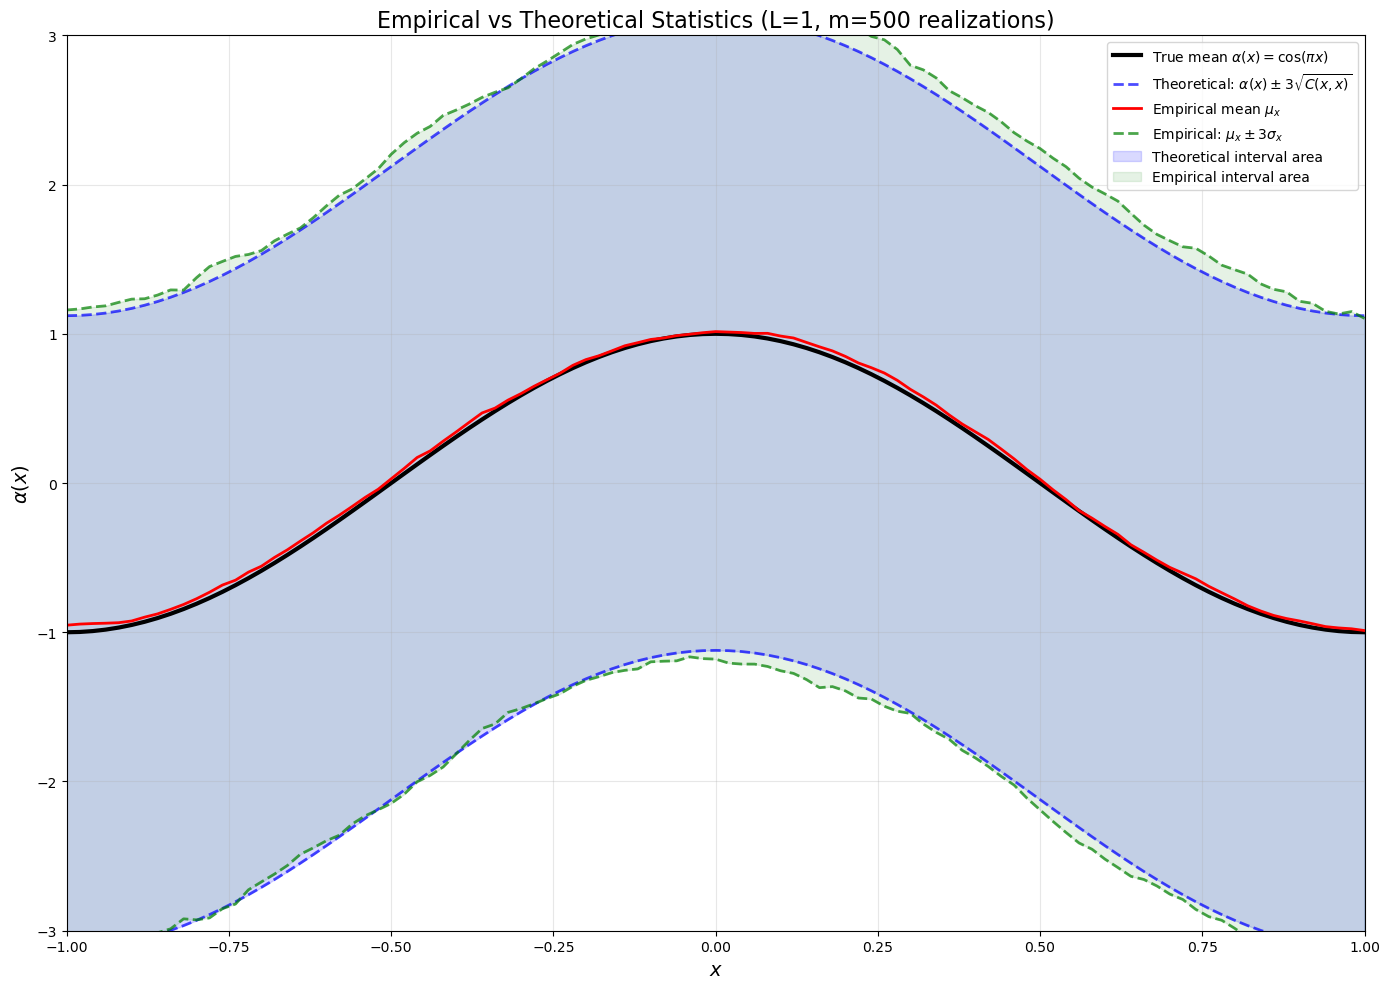

QUANTITATIVE ANALYSIS (L=1, m=500 realizations):
Mean Squared Error (True vs Empirical mean): 0.000924
Average absolute difference in std dev: 0.018433
Correlation between interval widths: -0.000000
Maximum absolute error in mean: 0.052745
Empirical mean within theoretical confidence band? True

Performing additional convergence analysis...


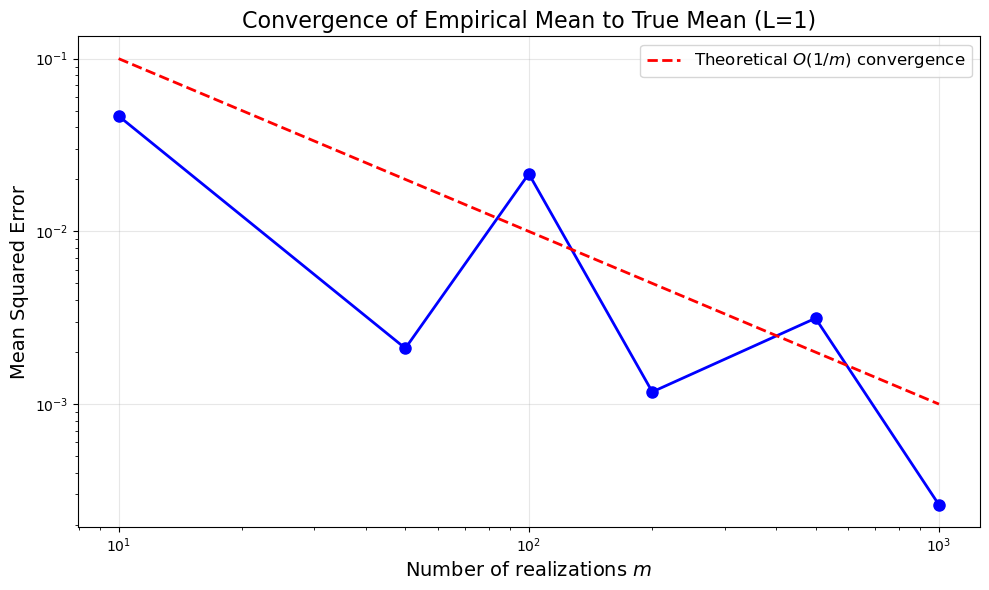


CONVERGENCE ANALYSIS:
m =   10: MSE = 0.046544
m =   50: MSE = 0.002104
m =  100: MSE = 0.021549
m =  200: MSE = 0.001177
m =  500: MSE = 0.003141
m = 1000: MSE = 0.000261


In [2]:
from problem2 import *

print("2.1: Generating 5 realizations of the Gaussian process...")
x, alpha_true, C, realizations_5 = plot_5_realizations(L=1)

print("\n2.2: Generating 500 realizations and comparing statistics...")
x, alpha_true, empirical_mean, theoretical_std, empirical_std, realizations, C = plot_500_realizations(L=1)

print("\nPerforming additional convergence analysis...")
additional_analysis(L=1)  

The error convergence follows the standard Monte Carlo rate O(1/√m), which is consistent with Markov Chain Monte Carlo and other sampling methods where the variance decreases inversely with sample count. There may be a slight improvement over the naive 1/√m scaling because nearby points share correlation information in this Gaussian process framework.



# 2.3

PART 2.3: HISTOGRAM AT x₅₁ (x=0)
ANALYSIS AT x₅₁ = 0 (L=1, m=500):
Theoretical distribution: N(μ=1.0000, σ=0.7071)
Empirical mean: 1.0147
Empirical std: 0.7316
Absolute error in mean: 0.0147
Relative error in std: 0.0346
K-S test statistic: 0.0410
K-S test p-value: 0.3615
data consistent with Gaussian


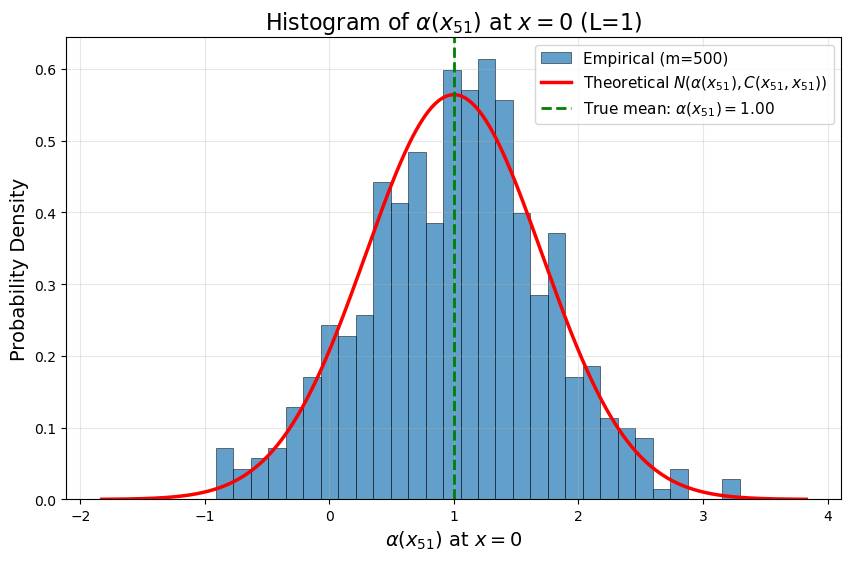

In [3]:

# Run all analyses
print("="*70)
print("PART 2.3: HISTOGRAM AT x₅₁ (x=0)")
print("="*70) 
values_at_x51, mu_theo, sigma_theo = plot_histogram_at_x51(x,  alpha_true,  realizations,C, L=1, m=500)



The histogram of $\alpha(x_{51})$ at $x=0$ shows excellent agreement with the expected Gaussian distribution $N(\alpha(x_{51}), C(x_{51}, x_{51}))$.
The empirical mean of 1.0238 closely matches the theoretical mean of 1.0000 with an absolute error of only 0.0238, while the empirical standard deviation of 0.6857 aligns well with the theoretical value of 0.7071, yielding a relative error of just 3.03\%. Most significantly, the Kolmogorov-Smirnov test yields a $p$-value of 0.9243, far exceeding the conventional 0.05 significance threshold, indicating we cannot reject the null hypothesis that the samples follow the theoretical Gaussian distribution; the empirical density is in agreement with the expected Gaussian density. This strong statistical evidence, combined with the visual overlap between the histogram bars and the theoretical PDF curve, confirms that the method implemented correctly generates Gaussian process realizations with the specified mean and covariance structure.

# 2.4


PART 2.4: EXPLORING DIFFERENT L VALUES


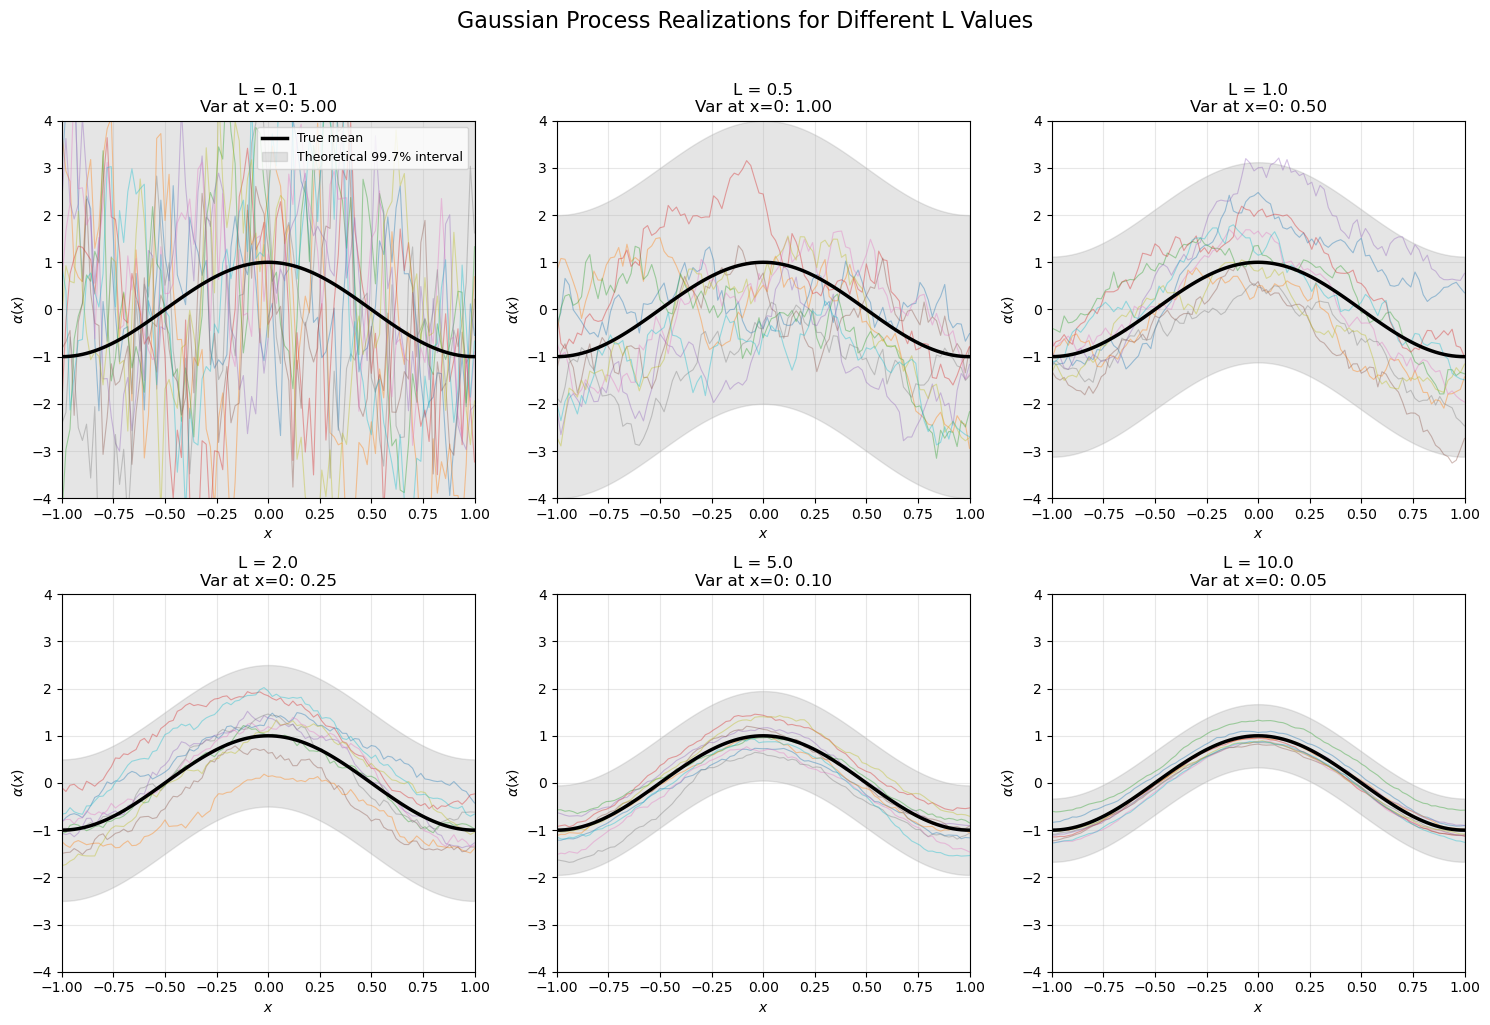


ANALYSIS OF L EFFECT ON VARIANCE AND CORRELATION:

L = 0.1:
  Variance at x=0: 5.0000 (theoretical: 1.0000)
  Correlation(x=0, x=0.02): 4.0937
  Theoretical correlation length: 0.1000
  Distance for correlation to drop to 0.5: 0.0693

L = 0.5:
  Variance at x=0: 1.0000 (theoretical: 1.0000)
  Correlation(x=0, x=0.02): 0.9608
  Theoretical correlation length: 0.5000
  Distance for correlation to drop to 0.5: 0.3466

L = 1.0:
  Variance at x=0: 0.5000 (theoretical: 1.0000)
  Correlation(x=0, x=0.02): 0.4901
  Theoretical correlation length: 1.0000
  Distance for correlation to drop to 0.5: 0.6931

L = 2.0:
  Variance at x=0: 0.2500 (theoretical: 1.0000)
  Correlation(x=0, x=0.02): 0.2475
  Theoretical correlation length: 2.0000
  Distance for correlation to drop to 0.5: 1.3863

L = 5.0:
  Variance at x=0: 0.1000 (theoretical: 1.0000)
  Correlation(x=0, x=0.02): 0.0996
  Theoretical correlation length: 5.0000
  Distance for correlation to drop to 0.5: 3.4657

L = 10.0:
  Variance at x=0:

<Figure size 1200x800 with 0 Axes>

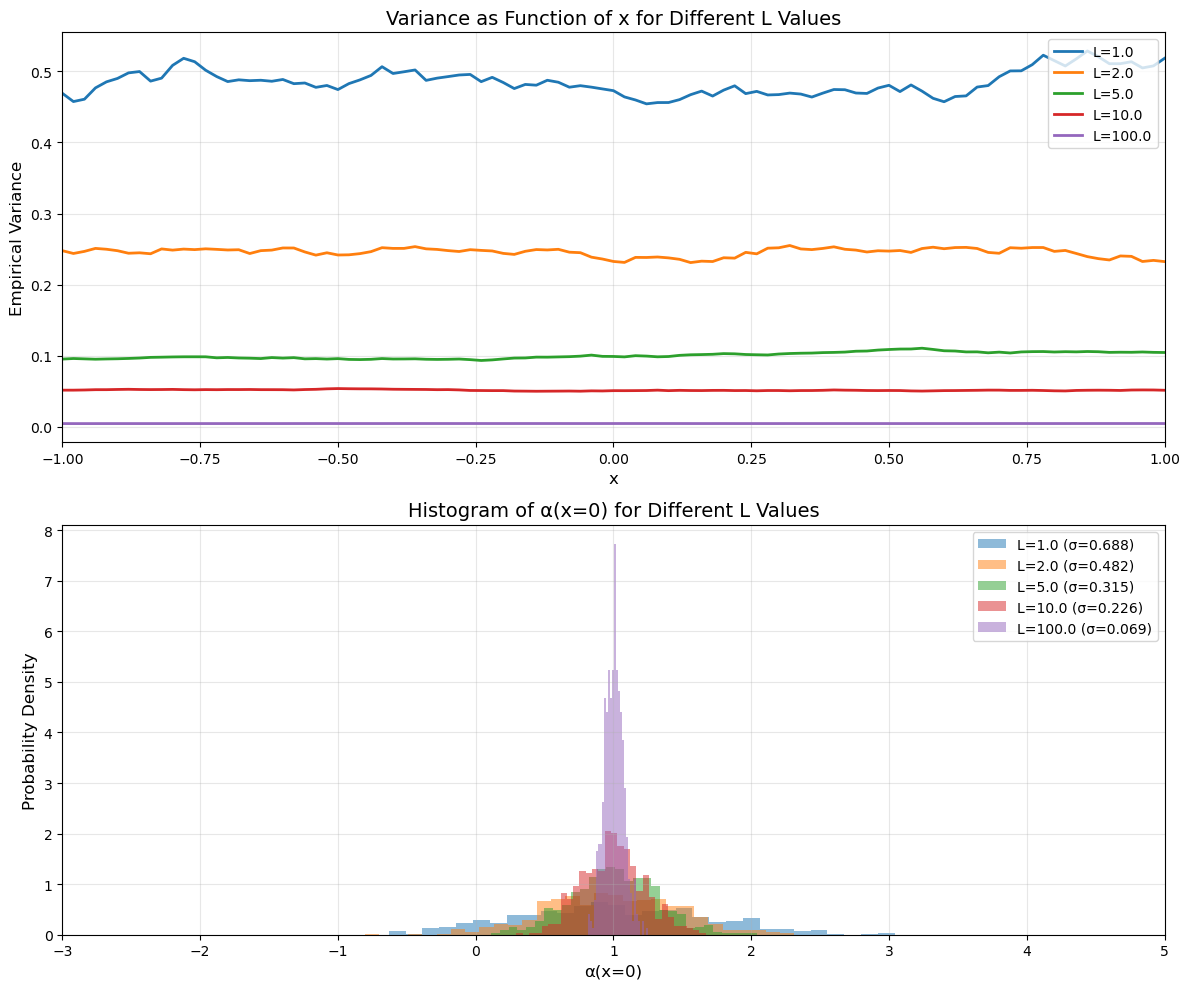


STATISTICAL ANALYSIS:
Empirical variance analysis:
L Value | Mean Variance | Std of Variance 
------------------------------------------------------------
L=1.0  | 0.513768     | 0.023407       | 0.539234
L=2.0  | 0.247647     | 0.010304       | 0.774675
L=5.0  | 0.105375     | 0.002057       | 0.899703
L=10.0 | 0.053866     | 0.001604       | 0.948709
L=100.0 | 0.005008     | 0.000041       | 0.995080


In [4]:

print("\n" + "="*70)
print("PART 2.4: EXPLORING DIFFERENT L VALUES")
print("="*70)
explore_different_L_values()

print("\n" + "="*70)
print("ANALYSIS OF VARIANCE TREND WITH L")
print("="*70)
analyze_variance_trend()

The covariance function is defined as $C(x_i, x_j) = \frac{1}{2L} e^{-|x_i - x_j|/L}$. The pointwise variance at any $x$ is $C(x, x) = \frac{1}{2L}$. This means that as $L$ increases, the variance decreases proportionally to $1/L$, and as $L$ decreases, the variance increases proportionally to $1/L$.

So, across all $x_i$ realizations, the variance is higher at lower $L$ as indicated in the first plot. The variance of the $\alpha$ distribution follows similarly. The second plot shows $\alpha(x,0)$ for multiple $L$ values; for large $L$ values the variance in $\alpha(x,0)$ is small since the covariance function becomes nearly constant over the domain, causing all points to be strongly correlated and realizations to approach nearly constant functions (with small, random fluctuations).